In [ ]:
# should allow text extraction from any image of handwriting on plain paper
# Output should be a high-quality image of the signature with a clean, white background 
# As an added challenge, automatically crop, enhance and resize this image to remove most of the page
# user interface should be simple and should read in and output a single image
# Adaptive thresholding might work well but test different types of thresholding 
# use segmentation masking to isolate the signature from the background 
# Handle the signature and background separately 

In [1]:
import cv2
import numpy as np
import easygui
from matplotlib import pyplot as plt

In [2]:
f = easygui.fileopenbox()
sign_img = cv2.imread(f)
copy = sign_img.copy()

In [3]:
# convert grayscale 
gray_img = cv2.cvtColor(sign_img, cv2.COLOR_BGR2GRAY)

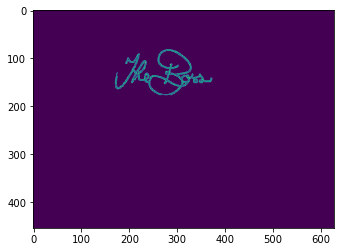

In [4]:
# using canny edge detection
canny = cv2.Canny(gray_img, 50, 120)
plt.imshow(canny)

In [5]:
# using Morphology Closing
kernel = np.ones((7, 23), np.uint8)
MorphClosing = cv2.morphologyEx(canny, cv2.MORPH_CLOSE, kernel)

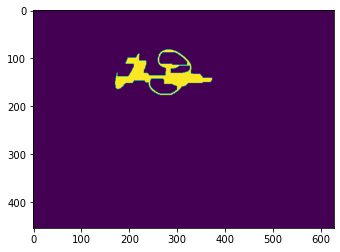

In [6]:
plt.imshow(MorphClosing)

In [7]:
# Find contours
contours, hierarchy = cv2.findContours(MorphClosing, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

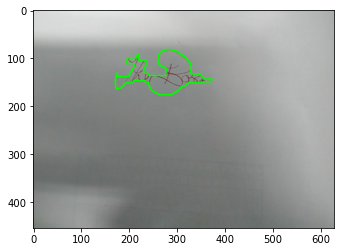

In [8]:
# Iterate through contours and draw the convex hull
cv2.drawContours(copy, contours, 0, (0, 255, 0), 2)
plt.imshow(copy)

In [9]:
# threshold input image using otsu thresholding as mask and refine with morphology
i = 0
for c in contours:
    # get the bounding rect
    x, y, w, h = cv2.boundingRect(c)
    # to save the images
    cv2.imwrite('image_{}.jpg'.format(i), sign_img[y:y+h, x:x+w])
    i += 1

In [10]:
sign_rect = cv2.imread('image_0.jpg')

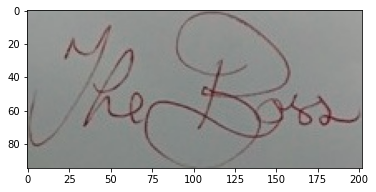

In [11]:
plt.imshow(sign_rect)

In [12]:
# Using Gamma collection for brightness 
gamma = 2.0

invGamma = 1 / gamma

table = [((i / 255) ** invGamma) * 255 for i in range(256)]
table = np.array(table, np.uint8)

bright_img = cv2.LUT(sign_rect, table)

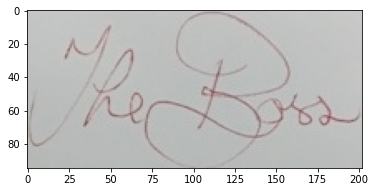

In [13]:
plt.imshow(bright_img)

In [14]:
# using adaptive guassian thresholding
grayScale = cv2.cvtColor(bright_img, cv2.COLOR_BGR2GRAY)
blur_img = cv2.medianBlur(grayScale, 3)

threshold = cv2.adaptiveThreshold(grayScale, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 6)

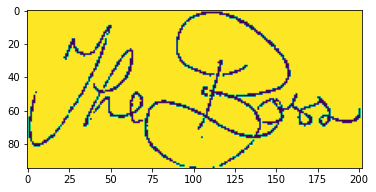

In [15]:
plt.imshow(threshold)

In [16]:
clear_img = cv2.cvtColor(threshold, cv2.COLOR_GRAY2BGR)

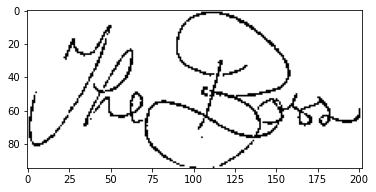

In [17]:
plt.imshow(clear_img)

In [18]:
# create padding for resize background
# put the signature right bottom side (same as other paper signature)
white = [255,255,255]
padding = cv2.copyMakeBorder(clear_img, 400, 120, 520, 20, cv2.BORDER_CONSTANT, value=white)

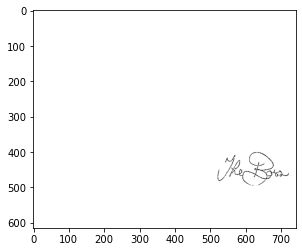

In [19]:
plt.imshow(padding)

In [20]:
# store the output into jpg file
output = 'signature-result.jpg'

In [21]:
cv2.imwrite(output, padding)

True